In [76]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder


In [77]:
df=pd.read_csv('combine-data(1500-and-clean).csv')
df.shape

(6322, 2)

In [78]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6317,spam,Earn money from home easily!
6318,spam,Click the link to win a new phone.
6319,spam,Buy now and save 70%!
6320,spam,Your package is waiting for confirmation.


In [79]:
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6317,1,Earn money from home easily!
6318,1,Click the link to win a new phone.
6319,1,Buy now and save 70%!
6320,1,Your package is waiting for confirmation.


In [80]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(414)

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(5158, 2)

## EDA

In [22]:
countes=df.value_counts(df['label'])

In [23]:
print(countes)

label
0    4825
1     747
Name: count, dtype: int64


In [29]:
import matplotlib.pyplot as plt

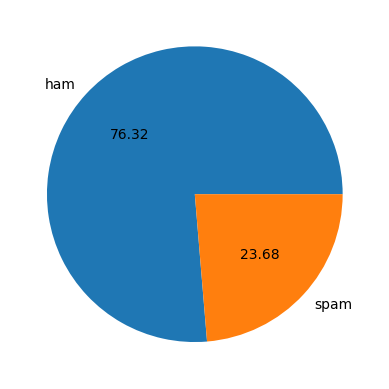

In [30]:
plt.pie(df.value_counts(df['label']),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## feature Engineering

In [14]:
df['characters']=df['message'].apply(len)

In [15]:
df.head()

,v1,messages,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [18]:
df.head()

,v1,messages,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['sentences']=df['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,v1,messages,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe()

,v1,characters,words,sentences
count,5158.000000,5158.000000,5158.000000,5158.000000
mean,0.124467,79.345677,18.569601,1.968592
std,0.330145,58.435917,13.391601,1.453494
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.750000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# ham messages
df[df['v1']==0].describe()

,v1,characters,words,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,71.024801,17.270815,1.826395
std,0.0,56.705369,13.575169,1.392743
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [23]:
# spam messages
df[df['v1']==1].describe()

,v1,characters,words,sentences
count,642.0,642.000000,642.000000,642.000000
mean,1.0,137.876947,27.705607,2.968847
std,0.0,30.075653,7.018958,1.479647
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.500000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

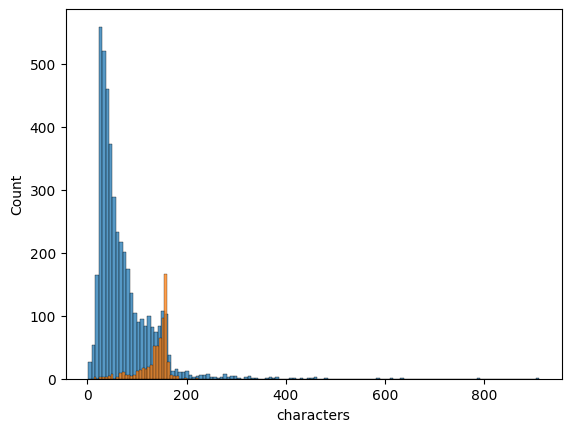

In [24]:
import seaborn as sns
sns.histplot(df[df['v1']==0]['characters'])
sns.histplot(df[df['v1']==1]['characters'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

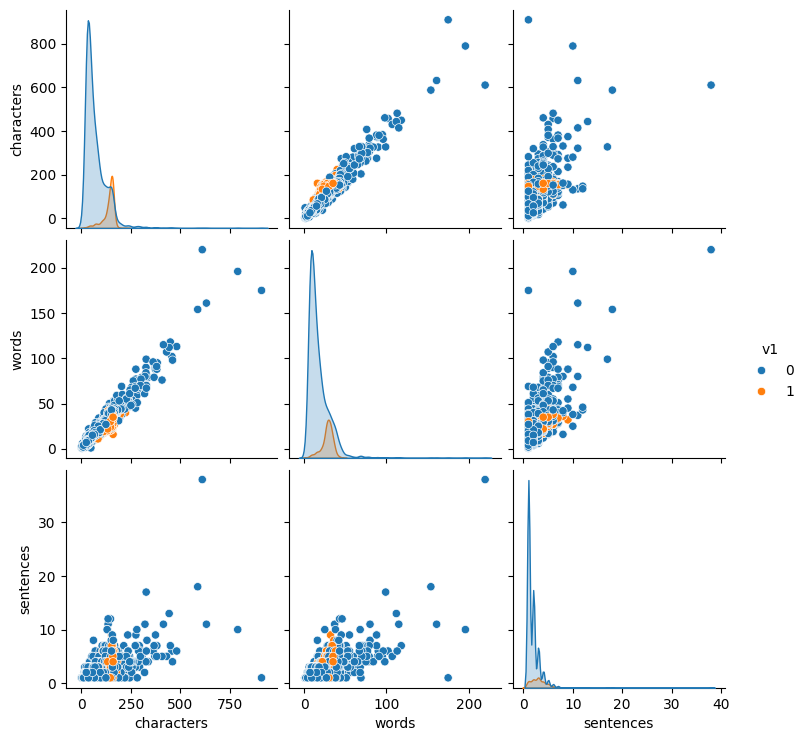

In [25]:
sns.pairplot(df,hue='v1')
nltk.download('stopwords')

## Data_processing

In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i  not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
text_transform("Your free ringtone is waiting to be collected. Simply text the password \MIX\ to 85069 to verify. Get Usher and Britney. FML  PO Box 5249  MK17 92H. 450Ppw 16")

<>:23: SyntaxWarning: invalid escape sequence '\M'
<>:23: SyntaxWarning: invalid escape sequence '\M'
C:\Users\goura\AppData\Local\Temp\ipykernel_8092\3876432772.py:23: SyntaxWarning: invalid escape sequence '\M'
  text_transform("Your free ringtone is waiting to be collected. Simply text the password \MIX\ to 85069 to verify. Get Usher and Britney. FML  PO Box 5249  MK17 92H. 450Ppw 16")


'free rington wait collect simpli text password 85069 verifi get usher britney fml po box 5249 mk17 92h 450ppw 16'

In [82]:
df['text_transform']=df['message'].apply(text_transform)


## word cloud for see the word those span and ham

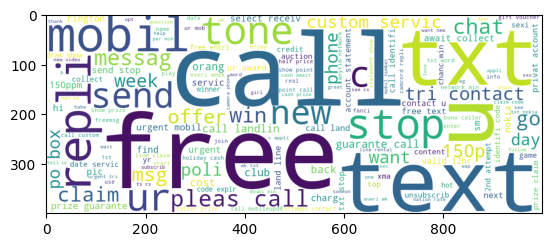

In [28]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=400,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['v1']==1]['text_transform'].str.cat(sep=" "))
plt.imshow(spam_wc)

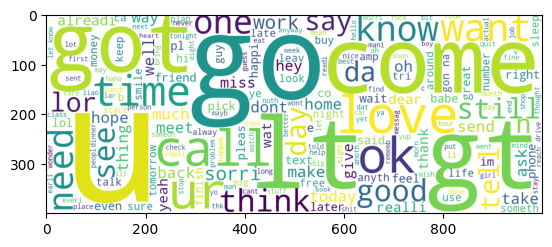

In [29]:
wc=WordCloud(width=1000,height=400,min_font_size=10,background_color='white')
notspam_wc=wc.generate(df[df['v1']==0]['text_transform'].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [30]:
spam_corpus=[]
for text in df[df['v1']==1]['text_transform'].tolist(): 
    for i in text.split():
        spam_corpus.append(i)


<BarContainer object of 30 artists>

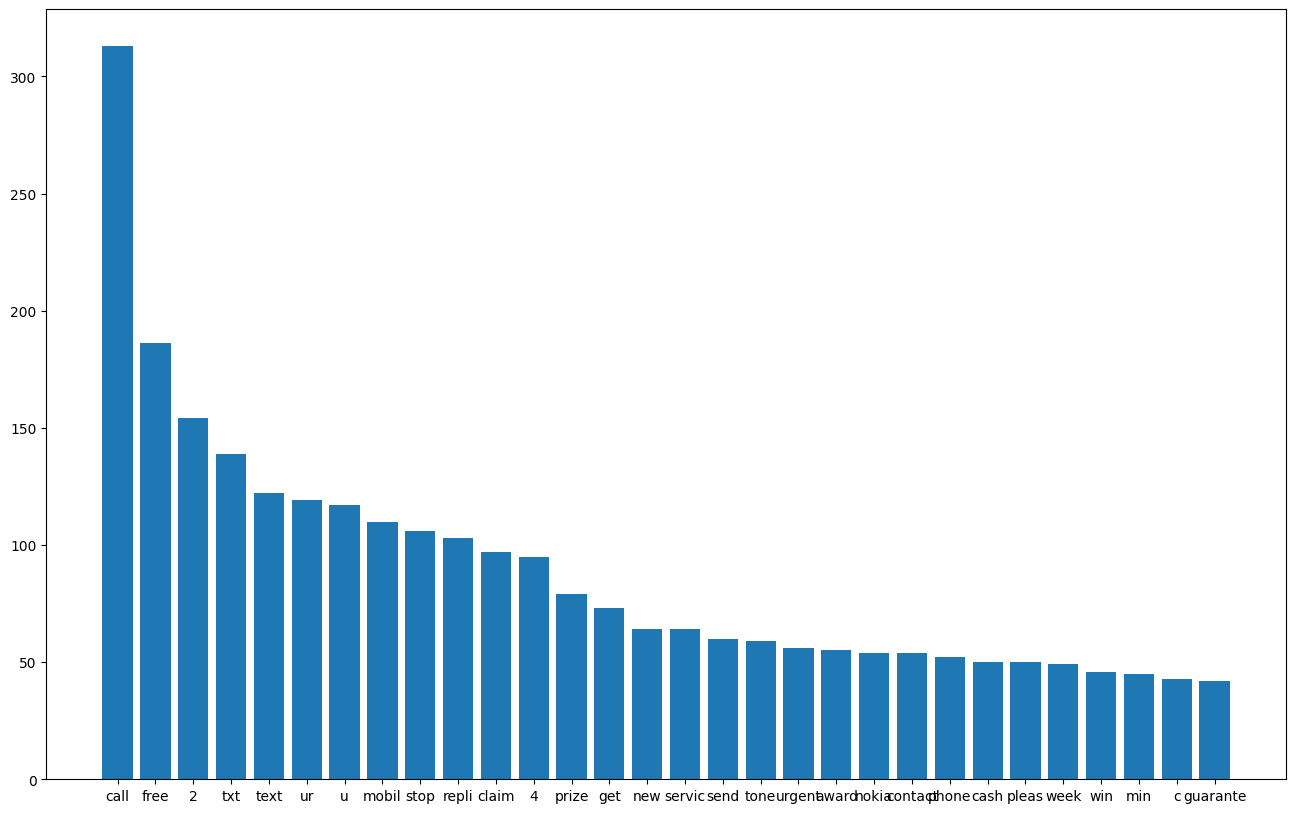

In [31]:
from collections import Counter
plt.figure(figsize=(16,10))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
            ,pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


In [83]:
df

,label,message,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
6317,1,Earn money from home easily!,earn money home easili
6318,1,Click the link to win a new phone.,click link win new phone
6319,1,Buy now and save 70%!,buy save 70
6320,1,Your package is waiting for confirmation.,packag wait confirm


## model training

In [84]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
 # x=cv.fit_transform(df['text_transform']).toarray()
x=tfidf.fit_transform(df['text_transform']).toarray()
# x = np.hstack((x,df['characters'].values.reshape(-1,1)))
print(x)
print(x.shape)
y=df['label'].values
y

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(6322, 6715)


array([0, 0, 1, ..., 1, 1, 1], shape=(6322,))

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
print(x_train)
print(y_train.shape)
print(y_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5057,)
(1265,)


In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [89]:
gau=GaussianNB()
mul=MultinomialNB()
ber=BernoulliNB()

In [61]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [90]:
gau.fit(x_train,y_train)


,priors,None
,var_smoothing,1e-09


In [91]:
test_predicted=gau.predict(x_test)
train_predict=gau.predict(x_train)
print(accuracy_score(test_predicted,y_test))
print(precision_score(y_test,test_predicted))
print(accuracy_score(train_predict,y_train))
print(confusion_matrix(y_test,test_predicted))

0.8853754940711462
0.6868932038834952
0.9262408542614198
[[837 129]
 [ 16 283]]


In [92]:
mul.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [93]:
mul_test_predicted=mul.predict(x_test)
mul_train_predict=mul.predict(x_train)
print(accuracy_score(mul_test_predicted,y_test))
print(precision_score(y_test,mul_test_predicted))
print(accuracy_score(mul_train_predict,y_train))
print(confusion_matrix(y_test,mul_test_predicted))

0.9723320158102767
0.9925373134328358
0.9831916155823611
[[964   2]
 [ 33 266]]


In [94]:
ber.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [95]:
ber_test_predicted=ber.predict(x_test)
ber_train_predict=ber.predict(x_train)
print(accuracy_score(ber_test_predicted,y_test))
print(precision_score(y_test,ber_test_predicted))
print(accuracy_score(ber_train_predict,y_train))
print(confusion_matrix(y_test,ber_test_predicted))

0.9786561264822135
0.9722222222222222
0.9857623096697646
[[958   8]
 [ 19 280]]


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [105]:
rfc.fit(x_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [106]:
rfc_test_predicted=rfc.predict(x_test)
rfc_train_predict=rfc.predict(x_train)
print(accuracy_score(rfc_test_predicted,y_test))
print(precision_score(y_test,rfc_test_predicted))
print(accuracy_score(rfc_train_predict,y_train))
print(confusion_matrix(y_test,rfc_test_predicted))

0.9770750988142293
1.0
1.0
[[966   0]
 [ 29 270]]


In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [50]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    predicted_test_value=clf.predict(x_test)
    predicted_train_value=clf.predict(x_train)
    accuracy_test_score=accuracy_score(y_test,predicted_test_value)
    accuracy_train_score=accuracy_score(y_train,predicted_train_value)
    precision=precision_score(y_test,predicted_test_value)
    return accuracy_test_score,accuracy_train_score,precision

In [51]:
result=[]
for name,clf  in clfs.items():
   accuracy_test_score,accuracy_train_score,precision=train_classifier(clf,x_train,y_train,x_test,y_test)
   result.append({
       "algorithm":name,
       "Accuracy_test":accuracy_test_score,
       "Accuracy_train":accuracy_train_score,
       "precision_score":precision
   })

df_results = pd.DataFrame(result)
print(df_results)

  algorithm  Accuracy_test  Accuracy_train  precision_score
0       SVC       0.984980        0.988333         0.992958
1        KN       0.920158        0.928416         1.000000
2        NB       0.972332        0.983192         0.992537
3        DT       0.867984        0.878386         0.928571
4        LR       0.963636        0.967965         0.973783
5        RF       0.977075        1.000000         1.000000
6  AdaBoost       0.823715        0.832312         0.872549
7       BgC       0.967589        0.999802         0.951049
8       ETC       0.981028        1.000000         0.996390
9      GBDT       0.938340        0.948191         0.974249


In [50]:
df_melted=df_results.melt(
    id_vars='algorithm',
    value_vars=['Accuracy_test','Accuracy_train','precision_score'],
    var_name='matric',
    value_name='score'
)
df_melted

,algorithm,matric,score
0,SVC,Accuracy_test,0.976744
1,KN,Accuracy_test,0.893411
2,NB,Accuracy_test,0.966085
3,DT,Accuracy_test,0.944767
4,LR,Accuracy_test,0.957364
5,RF,Accuracy_test,0.977713
6,AdaBoost,Accuracy_test,0.930233
7,BgC,Accuracy_test,0.968992
8,ETC,Accuracy_test,0.980620
9,GBDT,Accuracy_test,0.955426


<Axes: xlabel='algorithm', ylabel='score'>

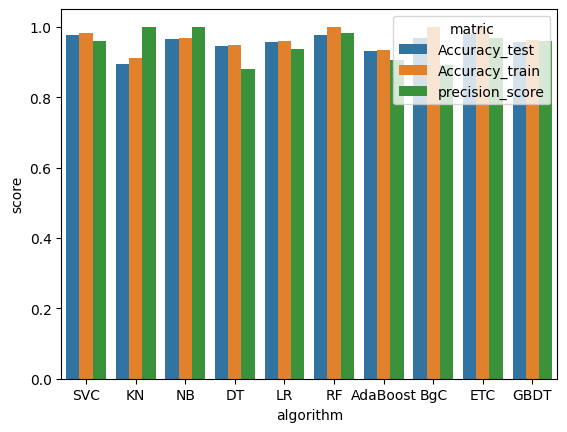

In [51]:
sns.barplot(x='algorithm',y='score',hue='matric',data=df_melted)